# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ITERATION CONSIDERED:**
- 100,200,500,1000,2000,5000

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K)
    

In [44]:
import sys,json

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization

### Load configuration file 

In [52]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)
    
config["data"]["mtl"]["ica_duration"]["spinalcord"]["dir"]="/ICA/results_spine_only/mtl/spinalcord/iterations_tests/"
config["data"]["gva"]["ica_duration"]["spinalcord"]["dir"]="/ICA/results_spine_only/gva/spinalcord/iterations_tests/"

# Qualitative evaluation

### Visualizing components: "gva" 1min vs 15min

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


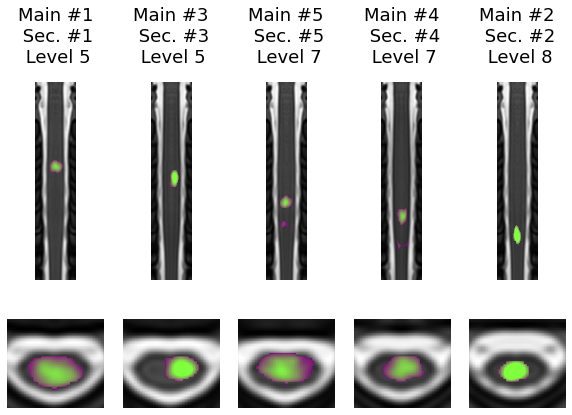

In [94]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration',"duration": "500min"}
params_qual_2 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration' ,"duration":"500min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)
plotting.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=1.5, uthresh=3, save_results=False)

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


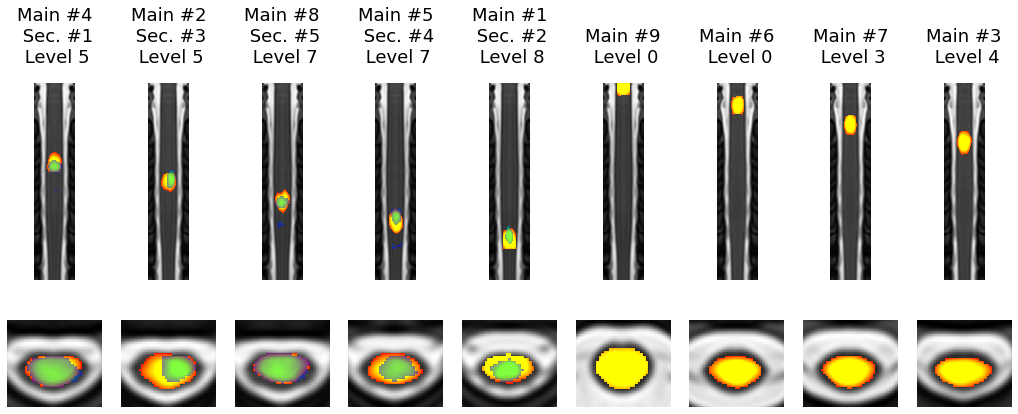

In [95]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration',"duration": "500min"}
params_qual_2 = {'k':9, 'dataset':'mtl', 'analysis':'ica_duration' ,"duration":"2000min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.5, uthresh=3, save_results=False)

# Quantitative analyses

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/500min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/100min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/200min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/500min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/1000min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/2000min/K_5/comp_zscored/*4D_K*
METHOD 3: Comparing sets of components across durations
... Computing simi

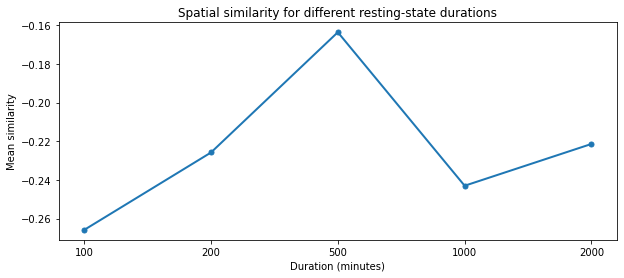

In [91]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[100,200,500,1000,2000]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':"mtl", 'analysis':"ica_duration",'t_range':[500]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=9,k2=5,t_range1=500,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/1000min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/100min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/200min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/500min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/1000min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests/2000min/K_5/comp_zscored/*4D_K*
METHOD 3: Comparing sets of components across durations
... Computing sim

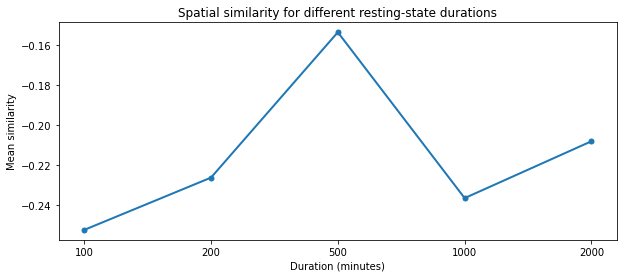

In [93]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[100,200,500,1000,2000]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':"mtl", 'analysis':"ica_duration",'t_range':[1000]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=9,k2=5,t_range1=1000,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/2000min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/100min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/200min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/500min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/1000min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/2000min/K_9/comp_zscored/*4D_K*
METHOD 3: Comparing sets of components across durations
... Computing sim

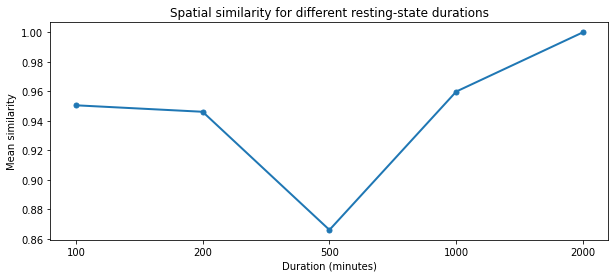

In [65]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="mtl"
t_range=[100,200,500,1000,2000]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':dataset, 'analysis':"ica_duration",'t_range':[2000]}
params_quant_gva_2 = {'k_range':range(9,10), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=9,t_range1=2000,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)

METHOD 3: Comparing sets of components across durations
... Computing similarity for K=5 between t=1 min and t=15 min
... Computing similarity for K=5 between t=2 min and t=15 min
... Computing similarity for K=5 between t=3 min and t=15 min
... Computing similarity for K=5 between t=4 min and t=15 min
... Computing similarity for K=5 between t=5 min and t=15 min
... Computing similarity for K=5 between t=6 min and t=15 min
... Computing similarity for K=5 between t=9 min and t=15 min
... Computing similarity for K=5 between t=12 min and t=15 min


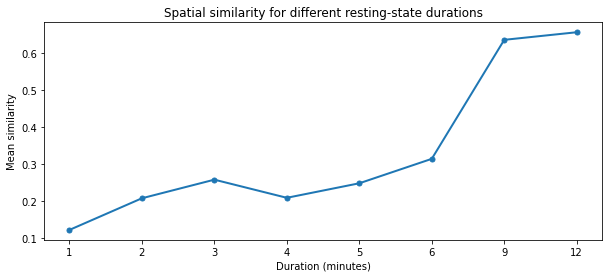

In [129]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[1,2,3,4,5,6,9,12]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"ica_duration",'t_range':[15]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Euclidean distance',save_results=True,save_figure=True)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

In [185]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/iterations_tests//K_5/comp_zscored/*4D_K
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests//K_9/comp_zscored/*4D_K
METHOD 1: Comparing two sets of components at specific K values 
gva_ica_duration at K = 5 vs mtl_ica_duration at K = 9 

The mean similarity is 0.53


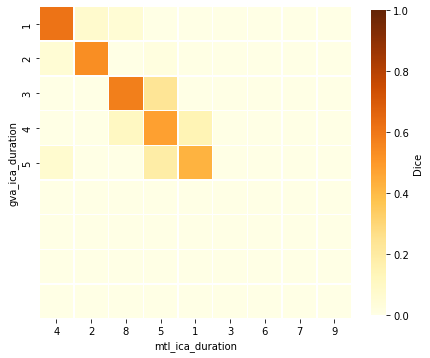

In [88]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_2 = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'ica_duration',"duration": "2000min"}
params_quant_gva_1 = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica_duration',"duration": "1000min"}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,k2=9,similarity_method='Dice',save_results=False,save_figure=False)

In [79]:
t_range2=2

In [210]:
np.array(t_range2).size

1

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs mtl_ica at K = 36 

The mean similarity is 0.47


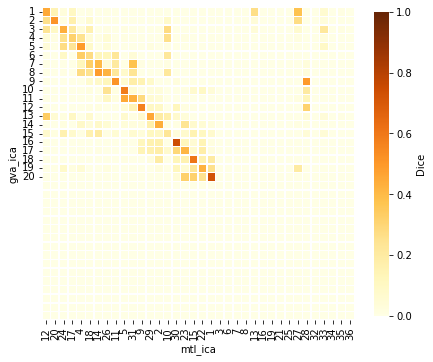

In [172]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=20,k2=36,similarity_method='Dice')

### Investigate axial distribution for different Ks

### `ICA` method

### Instantiate class

### Instantiate class

In [236]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.65


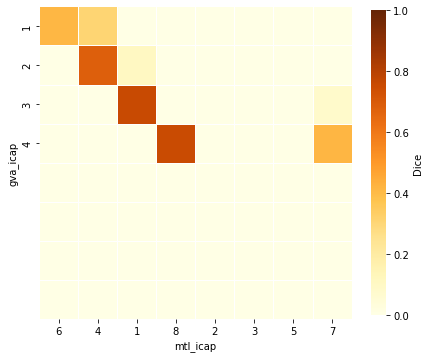

In [237]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.54


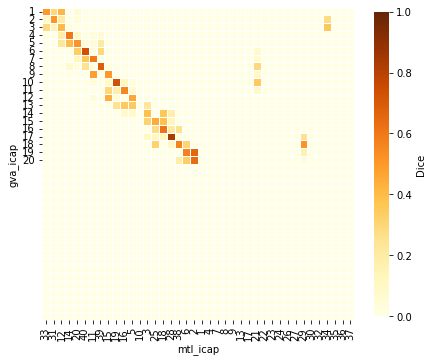

In [238]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')